# **CSI 382 - Data Mining and Knowledge Discovery**

# **Lab 8- Model Evaluation Techniques**

Nestled between the modeling and deployment phases comes the crucial evaluation phase, techniques for which are discussed in this notebook. 

In [ ]:
# Import the packages

import pandas as pd
import numpy as np
import itertools


import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
import os

# Any results you write to the current directory are saved as output.

**Mount with drive:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Loading the dataset**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/19. occupancy_data.csv')

#Check number of rows and columns in the dataset
print("The dataset has %d rows and %d columns." % df.shape)

The dataset has 20560 rows and 8 columns.


# **Data Preprocessing**

Checking for null values

In [ ]:
df.isnull().sum()

ID               0
date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

Describing the statistical inference from our dataset

In [ ]:
df.describe()

,ID,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,10280.500000,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,5935.305103,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,1.000000,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,5140.750000,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,10280.500000,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,15420.250000,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,20560.000000,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             20560 non-null  int64  
 1   date           20560 non-null  object 
 2   Temperature    20560 non-null  float64
 3   Humidity       20560 non-null  float64
 4   Light          20560 non-null  float64
 5   CO2            20560 non-null  float64
 6   HumidityRatio  20560 non-null  float64
 7   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 1.3+ MB


In [ ]:
df=df.drop(columns=["ID","date"],axis=1)

In [ ]:
df.head(10)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.180,27.2720,426.0,721.250000,0.004793,1
1,23.150,27.2675,429.5,714.000000,0.004783,1
2,23.150,27.2450,426.0,713.500000,0.004779,1
3,23.150,27.2000,426.0,708.250000,0.004772,1
4,23.100,27.2000,426.0,704.500000,0.004757,1
5,23.100,27.2000,419.0,701.000000,0.004757,1
6,23.100,27.2000,419.0,701.666667,0.004757,1
7,23.100,27.2000,419.0,699.000000,0.004757,1
8,23.100,27.2000,419.0,689.333333,0.004757,1
9,23.075,27.1750,419.0,688.000000,0.004745,1


# **Exploring the dataset**

Occupancy is the target column in the dataset. 

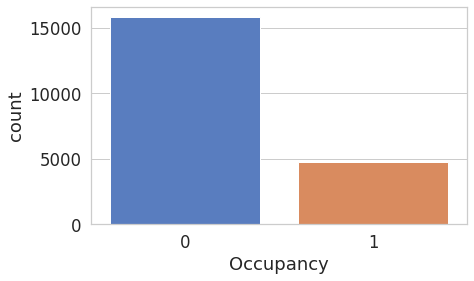

In [ ]:
sns.countplot(x='Occupancy',data=df)
plt.show()

Basic stat summary of the feature columns against the Outcome column to see any differences between having and not having diabetes.
We can notice some mean differences between having diabetes and no diabetes (may not be statistically significant within certain confidence level). It will be difficult to judge though if you have many more columns.

In [ ]:
grouped = df.groupby('Occupancy').agg({'Temperature':['mean', 'std', min, max], 
                                       'Humidity':['mean', 'std', min, max],
                                       'Light':['mean', 'std', min, max],
                                       'CO2':['mean', 'std', min, max],
                                       'HumidityRatio':['mean', 'std', min, max]
                                      })
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]
grouped # or grouped.T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  import sys


,Temperature_mean,Temperature_std,Temperature_min,Temperature_max,Humidity_mean,Humidity_std,Humidity_min,Humidity_max,Light_mean,Light_std,Light_min,Light_max,CO2_mean,CO2_std,CO2_min,CO2_max,HumidityRatio_mean,HumidityRatio_std,HumidityRatio_min,HumidityRatio_max
Occupancy,,,,,,,,,,,,,,,,,,,,
0,20.584830,0.894637,19.0,24.390000,27.529654,5.118819,16.745,39.5000,25.237893,81.823806,0.0,1546.333333,604.996614,253.026616,412.75,2076.5,0.004120,0.000740,0.002674,0.006218
1,21.975909,0.817660,19.5,24.408333,28.076209,4.472351,18.600,39.1175,481.967380,94.704345,0.0,1697.250000,975.321870,317.261466,439.00,2028.5,0.004589,0.000748,0.002715,0.006476


Let us have look at the distribution of the features grouping them by the Occupancy column.
Outcome 0 is no Occupancy, 1 is with Occupancy.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<Figure size 432x288 with 0 Axes>

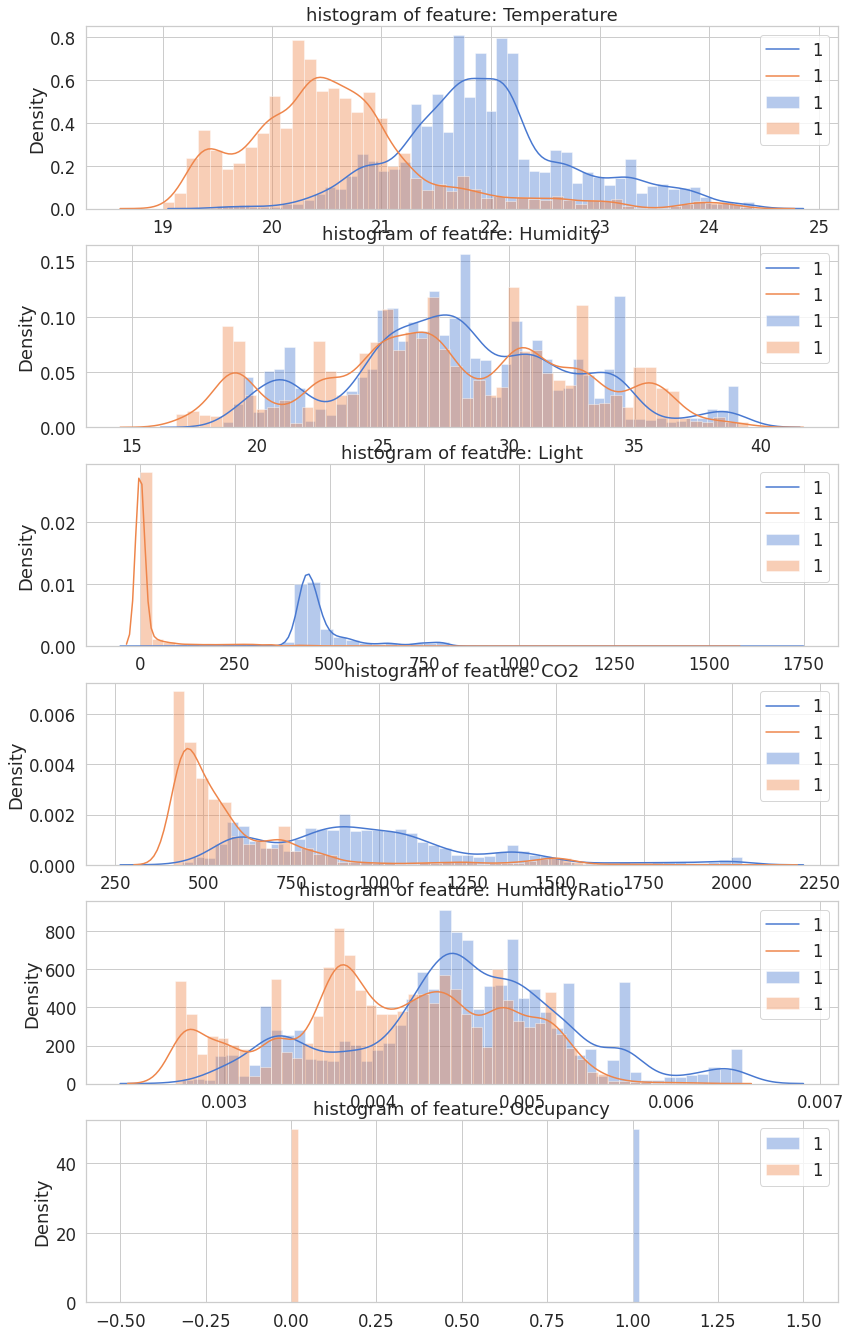

In [ ]:
plt.subplots_adjust(top=5)
columns=df.columns[:8]
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[columns]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Occupancy == 1], bins=50)
    sns.distplot(df[cn][df.Occupancy == 0], bins=50)
    ax.set_xlabel('')
    plt.legend(df["Occupancy"])
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

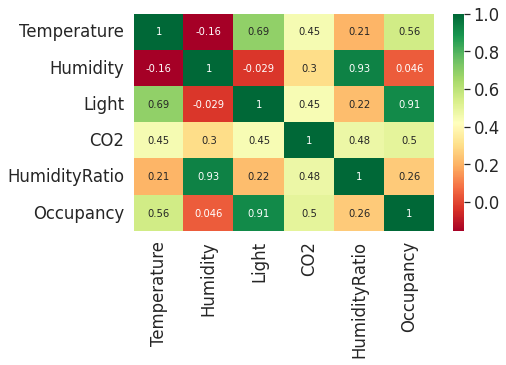

In [ ]:
sns.heatmap(df[df.columns[:8]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
plt.show()

# **Model Building**

In [ ]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

Split into train and test stratifying the 'Occupancy' column.
This guarantees the train-test split ratio in the 'Occupancy' column both in the training set and the testing set. 

# **Methods for evaluating the performance of a Classifier**


## **Holdout Method**

In the holdout method, the original data with labeled examples is partitioned into
two disjoint sets, called the training and the test sets, respectively. A classifica-
tion model is then induced from the training set and its performance is evaluated
on the test set. 

In [ ]:
outcome=df['Occupancy']
data=df[df.columns[:8]]

train,test=train_test_split(df,test_size=0.25,random_state=0,stratify=df['Occupancy'])# stratify the outcome

train_X=train[train.columns[:5]]
test_X=test[test.columns[:5]]
train_Y=train['Occupancy']
test_Y=test['Occupancy']

### **Feature Centering and Scaling**

train_X and test_X datasets are centered to zero and normalized by the std dev. This helps in faster gradient descent.


In [ ]:
features = train_X.columns.values

for feature in features:
    mean, std = df[feature].mean(), df[feature].std()
    train_X.loc[:, feature] = (train_X[feature] - mean) / std
    test_X.loc[:, feature] = (test_X[feature] - mean) / std

### **Compare model accuracies**

In [ ]:
accuracy_scores=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'Random forest', 'Naive Bayes']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(), 
        RandomForestClassifier(n_estimators=100,random_state=0), GaussianNB()]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    accuracy_scores.append(metrics.accuracy_score(prediction,test_Y))
    
models_dataframe=pd.DataFrame(accuracy_scores,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe.sort_values(['Accuracy'], ascending=[0])

,Accuracy
Random forest,0.993191
KNN,0.992802
Decision Tree,0.992412
Radial Svm,0.988521
Linear Svm,0.988327
Logistic Regression,0.988327
Naive Bayes,0.965953


We see that Random Forest classifier model has accuracy of 99.32%. Let us look at the feature importance in Random forest classifier.

In [ ]:
modelRF= RandomForestClassifier(n_estimators=100,random_state=0)
modelRF.fit(train_X,train_Y)
predictionRF=modelRF.predict(test_X)
pd.Series(modelRF.feature_importances_,index=train_X.columns).sort_values(ascending=False)

Light            0.720735
Temperature      0.141313
CO2              0.099115
HumidityRatio    0.022594
Humidity         0.016243
dtype: float64

Top five features is 'Light','Temperature','CO2','HumidityRatio','Humidity'.

## **k-fold Cross validation**

An alternative to random subsampling is cross-validation. In this approach, each
record is used the same number of times for training and exactly once for test-
ing. To illustrate this method, suppose we partition the data into two equal-sized
subsets. 

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.preprocessing import StandardScaler #Standardisation

In [ ]:
kfold = KFold(n_splits=10, random_state=42, shuffle=True) # k=10 splits the data into 10 equal parts

In [ ]:
# Starting with the original dataset and then doing centering and scaling
features=df[df.columns[:5]]
features_standard=StandardScaler().fit_transform(features)# Gaussian Standardisation
X=pd.DataFrame(features_standard,columns=['Temperature', 'Light', 'CO2','Humidity','HumidityRatio'])
X['Occupancy']=df['Occupancy']

In [ ]:
xyz=[]
accuracy=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree', 'Random forest', 'Naive Bayes']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(), 
        RandomForestClassifier(n_estimators=100,random_state=0), GaussianNB()]

for i in models:
    model = i
    cv_result = cross_val_score(model,X[X.columns[:5]], X['Occupancy'], cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)

cv_models_dataframe=pd.DataFrame(xyz, index=classifiers)   
cv_models_dataframe.columns=['CV Mean']    
cv_models_dataframe
cv_models_dataframe.sort_values(['CV Mean'], ascending=[0])

,CV Mean
KNN,0.993726
Random forest,0.992996
Decision Tree,0.991196
Radial Svm,0.989300
Logistic Regression,0.989008
Linear Svm,0.988911
Naive Bayes,0.967315


# **Comparing data mining methods**

We often need to compare two different learning methods on the same problem
to see which is the better one to use. It seems simple: estimate the error using
cross-validation (or any other suitable estimation procedure), perhaps repeated
several times, and choose the scheme whose estimate is smaller. 

In [ ]:
box=pd.DataFrame(accuracy,index=[classifiers])
boxT = box.T

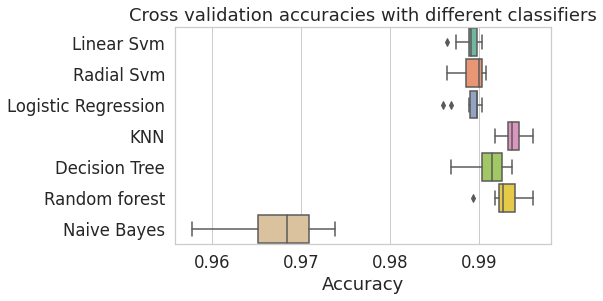

In [ ]:
ax = sns.boxplot(data=boxT, orient="h", palette="Set2", width=.9)
ax.set_yticklabels(classifiers)
ax.set_title('Cross validation accuracies with different classifiers')
ax.set_xlabel('Accuracy')
plt.show()

The above plots shows that KNN, Random forest,Decision tree performs better in cross validation while naive bayes is worse with wider distribution of their acccuracies.

# **Ensembling**

In ensemble methods, we create multiple models and then combine them that gives us better results. Enseble methods typically gives better accuracy than a single model. The models used to create such ensemble models are called base models.



In [ ]:
linear_svm=svm.SVC(kernel='linear',C=0.1,gamma=10, probability=True)
radial_svm=svm.SVC(kernel='rbf',C=0.1,gamma=10, probability=True)
lr=LogisticRegression(C=0.1)

In [ ]:
from sklearn.ensemble import VotingClassifier #for Voting Classifier

## **Ensamble with 3 classifiers combined: Linear SVM, radial SVM, Log Reg**

In [ ]:
ensembleModel=VotingClassifier(estimators=[('Linear_svm',linear_svm), ('Radial_svm', radial_svm), ('Logistic Regression', lr)], 
                                            voting='soft', weights=[1,2,3])

ensembleModel.fit(train_X,train_Y)
predictEnsemble = ensembleModel.predict(test_X)

In [ ]:
print('Accuracy of ensembled model with all the 3 classifiers is:', np.round(ensembleModel.score(test_X,test_Y), 4))

Accuracy of ensembled model with all the 3 classifiers is: 0.9885


# **ROC curve with AUC**

Lift charts are a valuable tool, widely used in marketing. They are closely re-
lated to a graphical technique for evaluating data mining schemes known as ROC
curves, which are used in just the same situation as the preceding one, in which
the learner is trying to select samples of test instances that have a high propor-
tion of positives. 

In [ ]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

### **For the ensembling method**

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_Y, predictEnsemble)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9904741069828275

Text(0.5, 0, 'False Positive Rate')

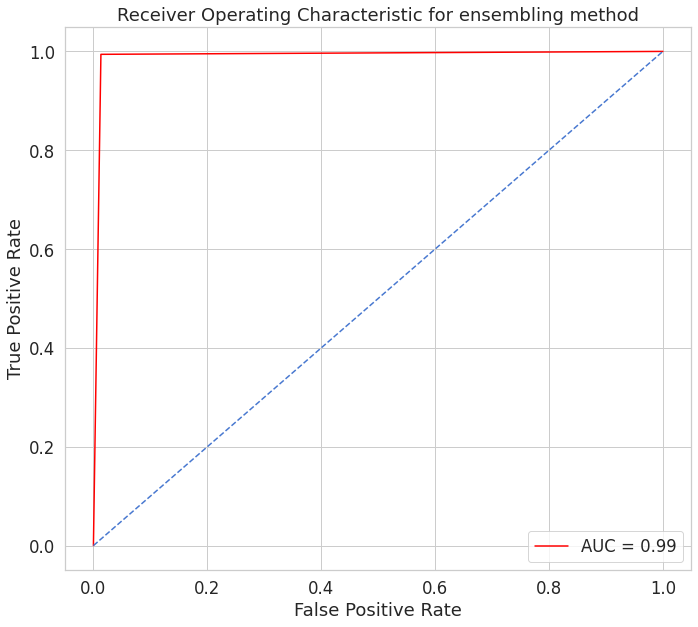

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for ensembling method')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### **For all methods**

In [ ]:
# Logistic regression
modelLR = LogisticRegression()
modelLR.fit(train_X,train_Y)
y_pred_prob_lr = modelLR.predict_proba(test_X)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(test_Y, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(test_Y, y_pred_prob_lr)

# SVM with rbf
modelSVMrbf=svm.SVC(kernel='rbf', probability=True)
modelSVMrbf.fit(train_X,train_Y)
y_pred_prob_SVMrbf = modelSVMrbf.predict_proba(test_X)[:,1]
fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(test_Y, y_pred_prob_SVMrbf)
roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(test_Y, y_pred_prob_SVMrbf)

# SVM with linear
modelSVMlinear=svm.SVC(kernel='linear', probability=True)
modelSVMlinear.fit(train_X,train_Y)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(test_X)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(test_Y, y_pred_prob_SVMlinear)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(test_Y, y_pred_prob_SVMlinear)

# KNN
modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(train_X,train_Y)
y_pred_prob_KNN = modelKNN.predict_proba(test_X)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(test_Y, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(test_Y, y_pred_prob_KNN)


# Decision Tree
modelTree=DecisionTreeClassifier()
modelTree.fit(train_X,train_Y)
y_pred_prob_Tree = modelTree.predict_proba(test_X)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(test_Y, y_pred_prob_Tree)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(test_Y, y_pred_prob_Tree)

# Random forest
modelRF= RandomForestClassifier(n_estimators=100,random_state=0)
modelRF.fit(train_X,train_Y)
y_pred_prob_rf = modelRF.predict_proba(test_X)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_Y, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(test_Y, y_pred_prob_rf)


# Naive Bayes
modelNB= GaussianNB()
modelNB.fit(train_X,train_Y)
y_pred_prob_nb = modelNB.predict_proba(test_X)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(test_Y, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(test_Y, y_pred_prob_nb)

# Ensamble 
y_pred_prob_en = ensembleModel.predict_proba(test_X)[:,1]
fpr_en, tpr_en, thresholds_en = roc_curve(test_Y, y_pred_prob_en)
roc_auc_en = auc(fpr_en, tpr_en)
precision_en, recall_en, th_en = precision_recall_curve(test_Y, y_pred_prob_en)

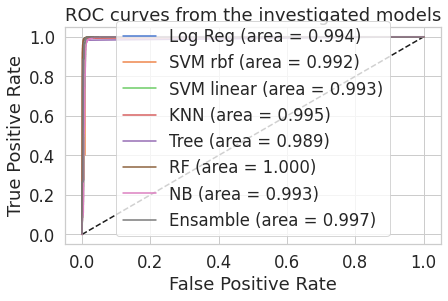

In [ ]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_SVMrbf, tpr_SVMrbf, label='SVM rbf (area = %0.3f)' % roc_auc_SVMrbf)
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)
plt.plot(fpr_Tree, tpr_Tree, label='Tree (area = %0.3f)' % roc_auc_Tree)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, label='NB (area = %0.3f)' % roc_auc_nb)
plt.plot(fpr_en, tpr_en, label='Ensamble (area = %0.3f)' % roc_auc_en)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

We see that RF,Ensamble,KNN and Log Reg models are better compared to the other models in AUC.

## **Precision-recall curve comparing the models**

Information retrieval researchers define parameters called \textit{recall} and \textit{precision}:
\begin{equation*}
    \begin{split}
        {recall} &= \frac{{number of documents retrieved that are relevant}}{{total number of documents that are relevant}}\\
        {precision} &= \frac{{number of documents retrieved that are relevant}}{{total number of documents that are retrieved }}
    \end{split}
\end{equation*}


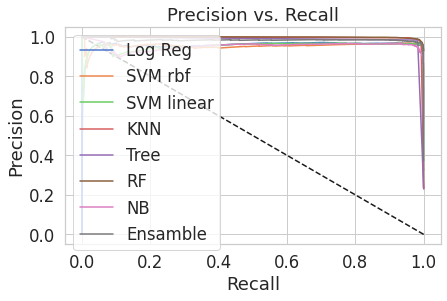

In [ ]:
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_lr, precision_lr, label='Log Reg')
plt.plot(recall_SVMrbf, precision_SVMrbf, label='SVM rbf')
plt.plot(recall_SVMlinear, precision_SVMlinear, label='SVM linear')
plt.plot(recall_KNN, precision_KNN, label='KNN')
plt.plot(recall_Tree, precision_Tree, label='Tree')
plt.plot(recall_rf, precision_rf, label='RF')
plt.plot(recall_nb, precision_nb, label='NB')
plt.plot(recall_en, precision_en, label='Ensamble')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

# **Predictive Occupancy**

## **Confusion matrix with ensamble model**

Let us look at the confusion matrix from the ensamble classifier.
First define a function to plot confusion matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

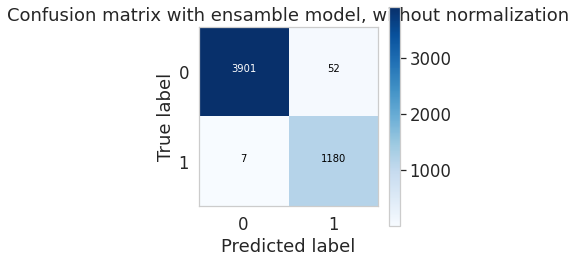

In [ ]:
class_names = test_Y.unique()
cmEnsamble = confusion_matrix(test_Y, predictEnsemble)
plt.grid(False)
plot_confusion_matrix(cmEnsamble, classes=class_names, title='Confusion matrix with ensamble model, without normalization')


The true positive rate is TP divided by the total number of positives, which is
TP + FN;
the false positive rate is FP divided by the total number of negatives, FP +
TN.
The overall success rate is the number of correct classifications divided by the
total number of classifications:
TP+TN
TP+TN+FP+FN
Finally, the error rate is one minus this.

## **Classification Report**

In [ ]:
print(metrics.classification_report(test_Y, predictEnsemble))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3953
           1       0.96      0.99      0.98      1187

    accuracy                           0.99      5140
   macro avg       0.98      0.99      0.98      5140
weighted avg       0.99      0.99      0.99      5140



# **Cost-sensitive learning**

## **Occupancy prediction using Neural Network with Keras**

Keras is a high level frame work for running neural network applications. It runs tensorflow at the backend.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# fix random seed for reproducibility
np.random.seed(42)

In [ ]:
train_Y = to_categorical(train_Y, num_classes = 2)
test_Y = to_categorical(test_Y, num_classes = 2)

In [ ]:
# Confirm the train-test split ratio
print(np.shape(train_X))
print(np.shape(train_Y))
print(np.shape(test_X))
print(np.shape(test_Y))

(15420, 5)
(15420, 2)
(5140, 5)
(5140, 2)


## **1. Create the model using Keras**

input_dim = 5 since we have 5 input variable.

In [ ]:
model = Sequential()
model.add(Dense(5, input_dim=5, activation='relu'))
model.add(Dense(8, input_dim=5, activation='relu'))
model.add(Dense(8, input_dim=5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 8)                 48        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 5)                 45        
                                                                 
 dense_4 (Dense)             (None, 4)                 24        
                                                                 
 dense_5 (Dense)             (None, 2)                 10        
                                                                 
Total params: 229
Trainable params: 229
Non-trainable pa

## **2. Compile the model**

Now the model is ready, we can compile it (using tensorflow under the hood or backend) and train it find the best weights for prediction. loss='binary_crossentropy' since the problem is binary classification.
optimizer='adam' since it is efficient and default default.
From metrics we collect the accuracy.


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## **3. Fit model**

We train the model by calling fit() on training data.
The number of iteration through the whole training datset is called "epoch". 

In [ ]:
epoch = 150
batch_size = 50

history = model.fit(train_X, train_Y, batch_size = batch_size, epochs = epoch, 
          validation_data = (test_X, test_Y), verbose = 2)

Epoch 1/150
309/309 - 2s - loss: 0.3949 - accuracy: 0.7987 - val_loss: 0.2051 - val_accuracy: 0.9619 - 2s/epoch - 6ms/step
Epoch 2/150
309/309 - 1s - loss: 0.1402 - accuracy: 0.9835 - val_loss: 0.0888 - val_accuracy: 0.9877 - 632ms/epoch - 2ms/step
Epoch 3/150
309/309 - 1s - loss: 0.0628 - accuracy: 0.9890 - val_loss: 0.0561 - val_accuracy: 0.9877 - 607ms/epoch - 2ms/step
Epoch 4/150
309/309 - 1s - loss: 0.0480 - accuracy: 0.9892 - val_loss: 0.0511 - val_accuracy: 0.9879 - 637ms/epoch - 2ms/step
Epoch 5/150
309/309 - 2s - loss: 0.0445 - accuracy: 0.9893 - val_loss: 0.0490 - val_accuracy: 0.9881 - 2s/epoch - 6ms/step
Epoch 6/150
309/309 - 1s - loss: 0.0432 - accuracy: 0.9894 - val_loss: 0.0485 - val_accuracy: 0.9879 - 940ms/epoch - 3ms/step
Epoch 7/150
309/309 - 1s - loss: 0.0423 - accuracy: 0.9893 - val_loss: 0.0475 - val_accuracy: 0.9881 - 676ms/epoch - 2ms/step
Epoch 8/150
309/309 - 1s - loss: 0.0420 - accuracy: 0.9892 - val_loss: 0.0469 - val_accuracy: 0.9883 - 616ms/epoch - 2ms/ste

We see that the model accuracy hovers around 99.07% in the testing data which is not better .

## **4. Evaluate model**

We evaluate the model on test dataset and obtain the score and accuracy.
Score is the evaluation of the loss function for a given input.


In [ ]:
score, acc = model.evaluate(test_X, test_Y)
print('Test score:', score)
print('Test accuracy:', acc)

161/161 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9889
Test score: 0.03997166082262993
Test accuracy: 0.9889104962348938


So we get 98.89% accuracy on the test dataset with this fully connected neural network (varies little bit run to run).


### **Training and validation curves vs. epoch**

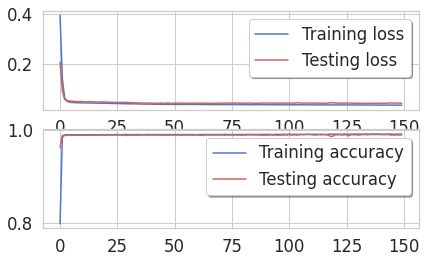

In [ ]:
# Plot the loss and accuracy curves for training and validation vs. epochs

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Testing loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Testing accuracy")
legend = ax[1].legend(loc='best', shadow=True)

plt.show()

### **Confusion matrix using this model**

Let us have a look at the correct and misclasssification in the confusion matrix.
I am using the below function for confusion matrix.

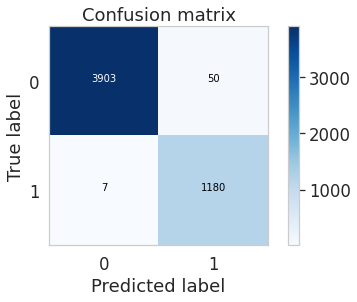

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(test_X)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_Y,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))
plt.grid(False)
plt.show()